<a href="https://colab.research.google.com/github/duskvirkus/alias-free-gan-pytorch/blob/main/notebooks/AliasFreeGAN_lightning_basic_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Training Colab Notebook for Alias Free GAN in pytorch lightning

## Setup

In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-2cea9039-11eb-56c7-d46b-78a91c0a0f95)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

%cd /content

if os.path.isdir("/content/drive/MyDrive/colab-afgan-lightning-test"):
    %cd /content/drive/MyDrive/colab-afgan-lightning-test/alias-free-gan-pytorch
else:
    if os.path.isdir("/content/drive/"):
      %cd /content/drive/MyDrive/
      !mkdir colab-afgan-lightning-test
      %cd colab-afgan-lightning-test
    !git clone https://github.com/duskvirkus/alias-free-gan-pytorch
    %cd alias-free-gan-pytorch
    !mkdir datasets

!pip install -r requirements.txt

/content
/content/drive/MyDrive
/content/drive/MyDrive/colab-afgan-lightning-test
Cloning into 'alias-free-gan-pytorch'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 199 (delta 79), reused 160 (delta 45), pack-reused 0
Receiving objects: 100% (199/199), 71.31 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (72/72), done.
/content/drive/MyDrive/colab-afgan-lightning-test/alias-free-gan-pytorch
     |████████████████████████████████| 819kB 6.9MB/s 
     |████████████████████████████████| 256kB 35.6MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 1.8MB 38.7MB/s 
     |████████████████████████████████| 112kB 24.7MB/s 
     |████████████████████████████████| 122kB 25.3MB/s 
     |████████████████████████████████| 266kB 34.1MB/s 
     |████████████████████████████████| 829kB 35.6MB/s 
     |███

## Dataset

Input is a folder of images.

Example structure:

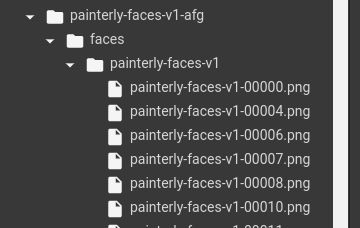



In [5]:
!python prepare_data.py --out /content/drive/MyDrive/colab-afgan-lightning-test/alias-free-gan-pytorch/datasets/painterly-faces-256 --n_worker 2 --size 256 /content/drive/MyDrive/datasets/painterly-faces-v1-afg

Make dataset of image sizes: 256
0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:387: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:387: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
490it [01:45,  4.63it/s]


## Train

In [6]:
!python trainer.py \
    --size 256 \
    --dataset_path "/content/drive/MyDrive/colab-afgan-lightning-test/alias-free-gan-pytorch/datasets/painterly-faces-256/" \
    --logger True \
    --weights_summary "full" \
    --gpus 1 \
    --batch 8

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/decorators.py:65: LightningDeprecationWarning: The `@auto_move_data` decorator is deprecated in v1.3 and will be removed in v1.5. Please use `trainer.predict` instead for inference. The decorator was applied to `forward`
  "The `@auto_move_data` decorator is deprecated in v1.3 and will be removed in v1.5."
/content/drive/MyDrive/colab-afgan-lightning-test/alias-free-gan-pytorch/datasets/painterly-faces-256/
Initialized MultiResolutionDataset dataset with 490 images
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2021-07-14 02:57:00.775028: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

    | Name                               | Type                | Params
-----------------------------------------------------------------------------
0   | generator                          | Generator    